# BEATS BL raytracing
##### Created on: 18/04/2020
##### Last update: 11/04/2021
##### Author: gianluca iori

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from pandas_ods_reader import read_ods
%precision %.3g

'%.3g'

## Downstream SESAME dipole effect
#### Modify and create source magnetic field file adding to the 3PW magnetic field the tail of one SESAME dipole at the correct distance

#### Load and display dipole tail field

In [2]:
# fileods = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/BEATS_BL_Flux_Density.ods'
# sheet_idx = 3 # beam size
# df = read_ods(fileods, sheet_idx)
names = ['dist', 'B']
dipolefieldfilecsv = 'upstream_dipole_field_tail.csv'
dipolefielddata = pd.read_csv(dipolefieldfilecsv, sep=',', names=names, skiprows=[0])

In [3]:
dipolefielddata.head()
# beamsizedata.info()

,dist,B
0,-5.011764,0.004097
1,-5.009758,0.004273
2,-5.007751,0.004456
3,-5.005745,0.004651
4,-5.003738,0.004852


In [4]:
%matplotlib inline

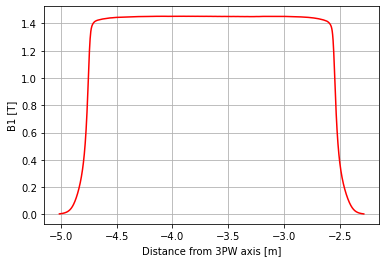

In [5]:
f = plt.figure()
plt.plot(dipolefielddata.dist, dipolefielddata.B, 'r')
plt.xlabel('Distance from 3PW axis [m]')
plt.ylabel('B1 [T]')
# plt.title('Hor. Beam size @ sample - Slits_1 OPEN')
plt.grid(True, which="both")
f.savefig("BEATS_upstream_dipole_field.png", bbox_inches='tight', dpi=600)

#### Given the geomertry of the BEATS FE (3mm OFFSET; 1mrad fix mask position and aperture) and the radius of the SESAME dipole, radiation from the upstream dipole can still enter through the fix mask opening UP TO A DISTANCE OF -2.521 m from the 3PW center

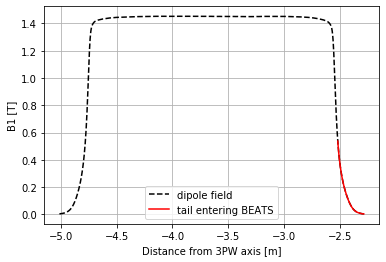

In [23]:
d_0 = -2.521 # [m]
arg_d_0 = np.argmin(np.abs(dipolefielddata.dist-d_0))
# dipolefielddata.dist[arg_d_0]
f = plt.figure()
plt.plot(dipolefielddata.dist, dipolefielddata.B, '--k')
plt.plot(dipolefielddata.dist[arg_d_0:], dipolefielddata.B[arg_d_0:], 'r')
plt.xlabel('Distance from 3PW axis [m]')
plt.ylabel('B1 [T]')
plt.legend(['dipole field','tail entering BEATS'])
# plt.title('Hor. Beam size @ sample - Slits_1 OPEN')
plt.grid(True, which="both")
f.savefig("BEATS_upstream_dipole_field_with_tail.png", bbox_inches='tight', dpi=600)

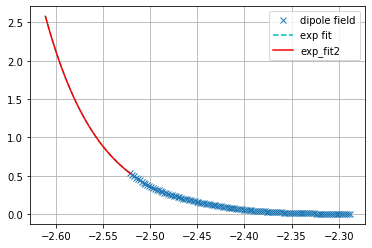

In [94]:
# fitting the tail with exponential law
from scipy import optimize
import math

# Fit the tail
# fitfunc = lambda p, x: p[0]*x**p[1] + p[2] # Target function
fitfunc = lambda p, x: p[0]*np.exp(x*p[1]) + p[2] # Target function

errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [0, -25., -2.5] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(dipolefielddata.dist[arg_d_0:], dipolefielddata.B[arg_d_0:]), ftol=1.49012e-14)
# p1 = optimize.curve_fit(fitfunc, dipolefielddata.dist[:arg_d_0], dipolefielddata.B[:arg_d_0]) # p0[:], 
x = np.concatenate(([1], dipolefielddata.dist[arg_d_0:]))
y = np.concatenate(([-0.000186], dipolefielddata.B[arg_d_0:]))
p2, success = optimize.leastsq(errfunc, p0[:], args=(x, y), ftol=1.49012e-10)

f = plt.figure()
D = np.linspace(dipolefielddata.dist[1200], dipolefielddata.dist[arg_d_0], 2000)
plt.plot(dipolefielddata.dist[arg_d_0:], dipolefielddata.B[arg_d_0:], "x", D, fitfunc(p1, D), "--c", D, fitfunc(p2, D), "r") # Plot of the data and the fit
plt.legend(['dipole field','exp fit', 'exp_fit2'])
plt.grid(True, which="both")
f.savefig("BEATS_upstream_dipole_field_tail_fit.png", bbox_inches='tight', dpi=600)

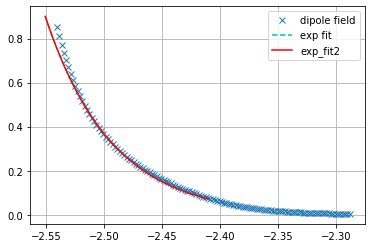

In [95]:
f = plt.figure()
D = np.linspace(dipolefielddata.dist[1230], dipolefielddata.dist[1300], 100)
plt.plot(dipolefielddata.dist[1235:], dipolefielddata.B[1235:], "x", D, fitfunc(p1, D), "--c", D, fitfunc(p2, D), "r") # Plot of the data and the fit
plt.legend(['dipole field','exp fit', 'exp_fit2'])
plt.grid(True, which="both")
p2
f.savefig("BEATS_upstream_dipole_field_tail_fitZOOM.png", bbox_inches='tight', dpi=600)

#### Load and display BEATS 3PW field

In [68]:
names = ['dist', 'B']
sourcefieldfilecsv = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/Bz_Alba_rev3.dat'
sourcefielddata = pd.read_csv(sourcefieldfilecsv, sep='\t', names=names, skiprows=[0])

In [69]:
sourcefielddata.tail()
# beamsizedata.info()

,dist,B
1995,0.996,-0.000190
1996,0.997,-0.000189
1997,0.998,-0.000188
1998,0.999,-0.000187
1999,1.000,-0.000186


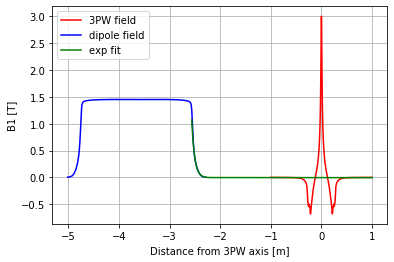

In [96]:
f = plt.figure()
plt.plot(sourcefielddata.dist, sourcefielddata.B, 'r')
plt.xlabel('Distance from 3PW axis [m]')
plt.ylabel('B1 [T]')
plt.grid(True, which="both")

# add plot of dipole
D = np.linspace(1, dipolefielddata.dist[arg_d_0]-0.04, 1000)
plt.plot(dipolefielddata.dist, dipolefielddata.B, "b", D, fitfunc(p2, D), "g") # Plot of the data and the fit
plt.legend(['3PW field', 'dipole field','exp fit'])
f.savefig("BEATS_3PW_with_upstream_dipole_tail_fit.png", bbox_inches='tight', dpi=600)

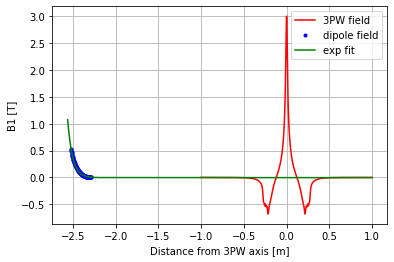

In [97]:
# ZOOM on the dipole tail
f = plt.figure()
plt.plot(sourcefielddata.dist, sourcefielddata.B, 'r')
plt.xlabel('Distance from 3PW axis [m]')
plt.ylabel('B1 [T]')
plt.grid(True, which="both")
D = np.linspace(1, dipolefielddata.dist[arg_d_0]-0.04, 1000)
plt.plot(dipolefielddata.dist[arg_d_0:], dipolefielddata.B[arg_d_0:], ".b", D, fitfunc(p2, D), "g") # Plot of the data and the fit
plt.legend(['3PW field', 'dipole field','exp fit'])
f.savefig("BEATS_3PW_with_upstream_dipole_tail_fit_ZOOM.png", bbox_inches='tight', dpi=600)

#### Concatenate dipole tail to 3PW field

In [98]:
dist_step = sourcefielddata.dist[2]-sourcefielddata.dist[1] # 1 mm
print('dist_step:', dist_step)
print('max dist:', dipolefielddata.dist[arg_d_0])

dist_step: 0.0010000000000000009
max dist: -2.5209866529659


In [99]:
dist2 = np.arange(-2.521, -1.001, 0.001)
B_dipole = fitfunc(p2, dist2)
sourcefielddata2 = {
    'y': np.concatenate((dist2, sourcefielddata.dist)),
    'Bz': np.concatenate((B_dipole, sourcefielddata.B))
}
data2 = pd.DataFrame(sourcefielddata2)

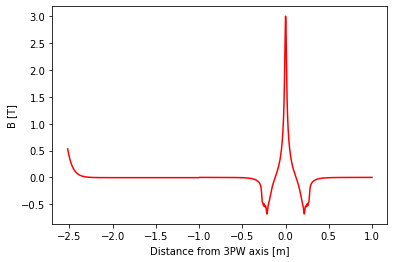

In [100]:
data2.tail()
f = plt.figure()
plt.plot(data2.y, data2.Bz, 'r')
plt.xlabel('Distance from 3PW axis [m]')
plt.ylabel('B [T]')
f.savefig("BEATS_3PW_with_upstream_dipole_tail.png", bbox_inches='tight', dpi=600)

### Write output file

In [101]:
sourcefieldfilecsv = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/Bz_Alba_rev3_upstream_dipole.dat'
data2.to_csv(sourcefieldfilecsv, header=False, index=False, sep='\t')

#### Smooth filter

In [238]:
window_len = 200
window='hamming'
s=np.r_[data2.B[window_len-1:0:-1],data2.B,data2.B[-2:-window_len-1:-1]]
print(len(s))

w_flat = np.ones(window_len,'d') #moving average
w = eval('np.'+window+'(window_len)')
y = np.convolve(w/w.sum(),s,mode='valid')
y_flat = np.convolve(w_flat/w_flat.sum(),s,mode='valid')

3933


In [247]:
from math import factorial
order = 1
deriv = 0
rate = 1

order_range = range(order+1)
half_window = (window_len -1) // 2
# precompute coefficients
b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
# pad the signal at the extremes with
# values taken from the signal itself 

firstvals = data2.B[0] - np.abs( data2.B[1:half_window+1][::-1] - data2.B[0] )
lastvals = data2.B[-1:] + np.abs(data2.B[-half_window-1:-1][::-1] - data2.B[-1:])
y = np.concatenate((firstvals, data2.B, lastvals))
y2 = np.convolve( m[::-1], y, mode='valid')

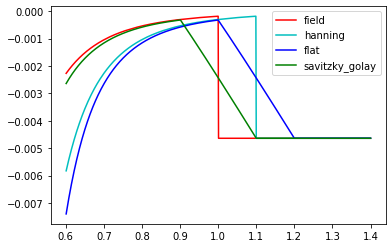

In [248]:
f = plt.figure()
plt.plot(data2.dist[1600:2400], data2.B[1600:2400], 'r', data2.dist[1600:2400], y[1600:2400], 'c', data2.dist[1600:2400], y_flat[1600:2400], 'b', data2.dist[1600:2400], y2[1600:2400], 'g')
plt.legend(['field', 'hanning', 'flat', 'savitzky_golay'])

In [8]:
%matplotlib inline

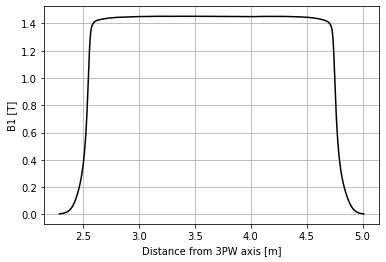

In [9]:
f = plt.figure()
plt.plot(dipolefielddata.dist, dipolefielddata.B, 'k')
plt.xlabel('Distance from 3PW axis [m]')
plt.ylabel('B1 [T]')
# plt.title('Hor. Beam size @ sample - Slits_1 OPEN')
plt.grid(True, which="both")
# f.savefig("H_FOV.png", bbox_inches='tight', dpi=600)

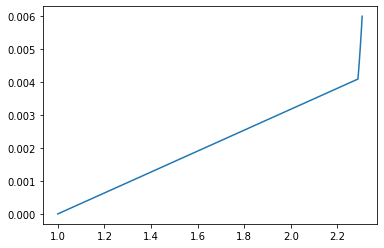

In [104]:



f = plt.figure()
np.concatenate(([1], dipolefielddata.dist[:10]))
plt.plot(np.concatenate(([1.], dipolefielddata.dist[:10])), np.concatenate(([0.], dipolefielddata.B[:10])))


### Beam size @ sample - Slits_1 as secondary source

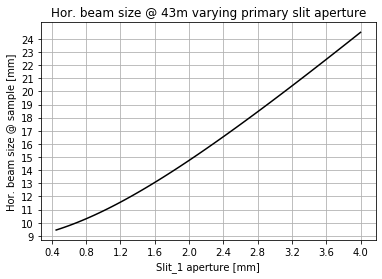

In [4]:
a = np.arange(4.0e-3, 0.4e-3, -0.05e-3) # primary slit aperture [m]
d = 7.635 # [m] distance source - slits (CORRECT)
d_sample = 43 # [m]
# eta_x = (ss_x + a)/(2*d)
eta_x_2 = np.sqrt((ss_x/2)**2 + (a/2)**2)/(d)   # half divergence
f = plt.figure()
# plt.plot(a*1e3, 2e3*eta_x_2*(d_sample-d), '--k')
# plt.plot(a*1e3, 1e3*np.sqrt(a**2+(2*eta_x_2*(d_sample-d))**2), 'k')
plt.plot(a*1e3, 1e3*(a+(np.sin(2*eta_x_2)*(d_sample-d))), 'k')
plt.xlabel('Slit_1 aperture [mm]')
plt.ylabel('Hor. beam size @ sample [mm]')
plt.title('Hor. beam size @ 43m varying primary slit aperture')
plt.xticks(np.arange(0.4, 4.2, 0.4))
plt.yticks(np.arange(9, 25, 1))
plt.grid(True, which="both")
f.savefig("slit_VS_H_FOV.png", bbox_inches='tight', dpi=600)

### Beam size @ sample (from SHADOW) - Slits_1 as secondary source

#### Import data

In [5]:
# fileods = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/BEATS_BL_Flux_Density.ods'
# sheet_idx = 3 # beam size
# df = read_ods(fileods, sheet_idx)
names = ['slit', 'FWHM_X', 'FWHM_Z', 'tot_rays', 'good_rays']
beamsizefilecsv = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/BEATS_BL_beam_size.csv'
beamsizedata = pd.read_csv(beamsizefilecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4])

In [6]:
beamsizedata.head()
# beamsizedata.info()

,slit,FWHM_X,FWHM_Z,tot_rays,good_rays
0,OPEN,72035.3831,13499.693,5.00E+06,739720
1,1,8281.4208,4853.4629,1.00E+07,3.29E+04
2,0.9,7962.9046,4358.3421,1.00E+07,26789
3,0.8,7414.2014,3845.5088,1.00E+07,2.12E+04
4,0.7,7740.4364,3378.1385,1.00E+07,16127


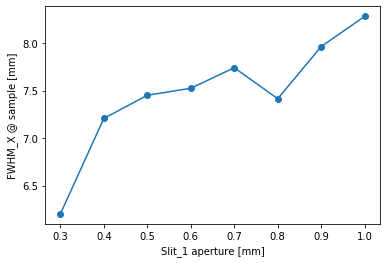

In [9]:
f = plt.figure()
plt.plot(beamsizedata['slit'][1:9].astype('float'), 1e-3*beamsizedata['FWHM_X'][1:9].astype('float'), '-o')
plt.xlabel('Slit_1 aperture [mm]')
plt.ylabel('FWHM_X @ sample [mm]')
f.savefig("slit_VS_FWHM_X.png", bbox_inches='tight', dpi=600)

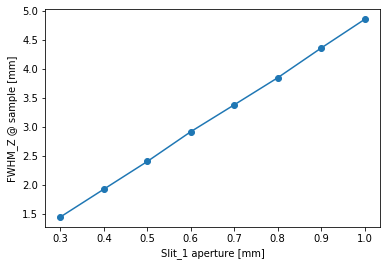

In [8]:
f = plt.figure()
plt.plot(beamsizedata['slit'][1:9].astype('float'), 1e-3*beamsizedata['FWHM_Z'][1:9].astype('float'), '-o')
plt.xlabel('Slit_1 aperture [mm]')
plt.ylabel('FWHM_Z @ sample [mm]')
f.savefig("slit_VS_FWHM_Z.png", bbox_inches='tight', dpi=600)

### Slit aperture VS flux

In [68]:
# load wiggler spectrum
names = ['PhotonEnergy', 'Flux', 'PowerDensity']
fluxfilecsv = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/xwiggler.spec'
fluxdata = pd.read_csv(fluxfilecsv, sep='\s+', names=names, skiprows=[0, 1, 2, 3, 4])
fluxdata.head()

,PhotonEnergy,Flux,PowerDensity
0,5000.000000,3.622789e+14,0.058043
1,5045.045045,3.597704e+14,0.057642
2,5090.090090,3.572883e+14,0.057244
3,5135.135135,3.548323e+14,0.056850
4,5180.180180,3.524020e+14,0.056461


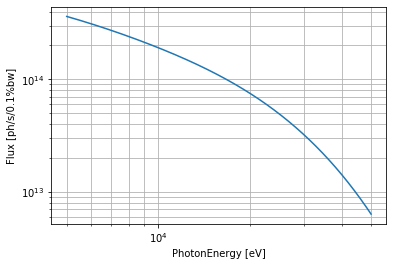

In [86]:
# plot wiggler spectrum
f, ax = plt.subplots()
ax.loglog(fluxdata['PhotonEnergy'], fluxdata['Flux'])
plt.xlabel('PhotonEnergy [eV]')
plt.ylabel('Flux [ph/s/0.1%bw]')
# plt.xticks(np.arange(5e3, 6e4, 5e3))
plt.grid(True, which="both")
f.savefig("3PW_flux_XOP.png", bbox_inches='tight', dpi=600)

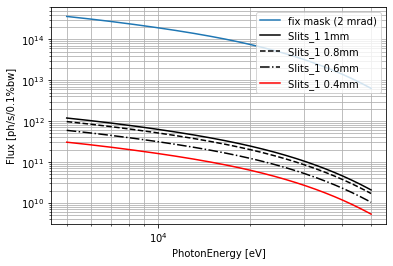

In [115]:
# intensity closing the Slits_1
I = beamsizedata['good_rays'][0:8].astype('float')/beamsizedata['tot_rays'][0:8].astype('float')


f, ax = plt.subplots()
ax.loglog(fluxdata['PhotonEnergy'], fluxdata['Flux'])
plt.xlabel('PhotonEnergy [eV]')
plt.ylabel('Flux [ph/s/0.1%bw]')
# plt.xticks(np.arange(5e3, 6e4, 5e3))
plt.grid(True, which="both")

plt.plot(fluxdata['PhotonEnergy'], I[1]*fluxdata['Flux'], 'k')
plt.plot(fluxdata['PhotonEnergy'], I[2]*fluxdata['Flux'], '--k')
plt.plot(fluxdata['PhotonEnergy'], I[4]*fluxdata['Flux'], '-.k')
plt.plot(fluxdata['PhotonEnergy'], I[6]*fluxdata['Flux'], 'r')
# plt.plot(fluxdata['PhotonEnergy'], I[7]*fluxdata['Flux'], '--r')

plt.legend(['fix mask (2 mrad)', 'Slits_1 1mm', 'Slits_1 0.8mm', 'Slits_1 0.6mm', 'Slits_1 0.4mm'], loc='upper right')
f.savefig("slits1_VS_Flux.png", bbox_inches='tight', dpi=600)

### Slit aperture VS coherence length

Coherence length @ 20keV:
- ID19@ESRF (l=145m): 180.0217 [micron]
- TOMCAT@SLS (l=34m): 7.5379 [micron]
- SYRMEP@Elettra (l=23m): 3.6238 [micron]
- TopoTomo@ANKA (l=33m): 2.0485 [micron]
- BEATS - Slits_1 OPEN (l=40m): 0.6569 [micron]


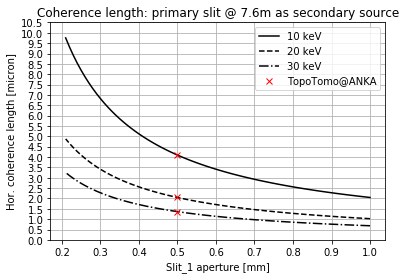

In [104]:
from scipy.constants import c, h
# eN = np.arange(1e3,100e3,1e3) # 1 - 100 keV
eN = np.arange(10e3,40e3,10e3) # 10 - 50 keV
l = (h*c)/(eN*1.6e-19) # wavelength [m]
ss_x_0 = 1.89e-3 # [m] Hor. photon source size
ss_x = np.arange(1.0e-3, 0.2e-3, -0.01e-3) # secondary source size (slit aperture) [m]
ss_x_topotomo = [0.5e-3, 0.5e-3, 0.5e-3] # [mm] (FWHM)
ss_x_TOMCAT = [0.05e-3, 0.05e-3, 0.05e-3] # [mm] (FWHM)
z = 33 # [m] distance primary slits - sample @ 41m - up to 35 m actually
z_topotomo = [33, 33, 33] # [m]
z_TOMCAT = [34, 34, 34] # [m]
lc_topotomo = (np.multiply(l,z_topotomo)/np.multiply(2,ss_x_topotomo))*1e6
lc_TOMCAT = np.multiply(l,z_TOMCAT)/np.multiply(2,ss_x_TOMCAT)*1e6

print("Coherence length @ 20keV:")
print("- ID19@ESRF (l=145m): %.4f [micron]"%((l[1]*145/(2*25e-6))*1e6))
print("- TOMCAT@SLS (l=34m): %.4f [micron]"%((l[1]*34/(2*140e-6))*1e6))
print("- SYRMEP@Elettra (l=23m): %.4f [micron]"%((l[1]*23/(2*197e-6))*1e6))
print("- TopoTomo@ANKA (l=33m): %.4f [micron]"%((l[1]*33/(2*0.5e-3))*1e6))
print("- BEATS - Slits_1 OPEN (l=40m): %.4f [micron]"%((l[1]*40/(2*ss_x_0))*1e6))

# plots
f = plt.figure()
plt.plot(ss_x*1e3,(l[0]*z/(2*ss_x))*1e6, 'k') # 10keV
plt.plot(ss_x*1e3,(l[1]*z/(2*ss_x))*1e6, '--k') # 20keV
plt.plot(ss_x*1e3,(l[2]*z/(2*ss_x))*1e6, '-.k') # 30keV
plt.plot(np.multiply(ss_x_topotomo, 1e3), lc_topotomo, 'xr') # TopoTomo@ANKA

plt.yticks(np.arange(0, 11, 0.5))
plt.grid(True, which="both")
plt.legend(['10 keV', '20 keV', '30 keV', 'TopoTomo@ANKA'])

plt.xlabel('Slit_1 aperture [mm]')
plt.ylabel('Hor. coherence length [micron]')
plt.title('Coherence length: primary slit @ 7.6m as secondary source')
f.savefig("slit_VS_Hlc.png", bbox_inches='tight', dpi=600)

### Slit aperture VS blur

Text(0.5, 1.0, 'Blurring: primary slit @ 10m as secondary source')

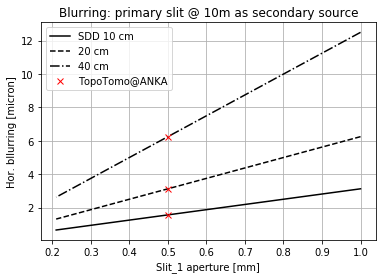

In [53]:
z1 = 32 #[m]
z2 = [0.1, 0.2, 0.4] # [m]

# plots
f = plt.figure()
plt.plot(ss_x*1e3, (z2[0]/z1)*ss_x*1e6, 'k') # SDD 10 cm
plt.plot(ss_x*1e3, (z2[1]/z1)*ss_x*1e6, '--k') # SDD 20 cm
plt.plot(ss_x*1e3, (z2[2]/z1)*ss_x*1e6, '-.k') # SDD 40 cm
plt.plot(np.multiply(ss_x_topotomo, 1e3), np.divide(z2, z1)*0.5*1e3, 'xr') # TopoTomo@ANKA

# plt.yticks(np.arange(0, 11, 0.5))
plt.grid(True, which="both")
plt.legend(['SDD 10 cm', '20 cm', '40 cm', 'TopoTomo@ANKA'])

plt.xlabel('Slit_1 aperture [mm]')
plt.ylabel('Hor. bllurring [micron]')
plt.title('Blurring: primary slit @ 10m as secondary source')
f.savefig("slit_VS_blurring.png", bbox_inches='tight', dpi=600)

## Flux density @ sample

In [10]:
# load Oasys results
names = ['E', 'E0', 'E1', 'DMM_incident_angle', 'Flux', 'FWHM_X', 'FWHM_Z', 'Flux_d_2BW', 'Flux_d1BW']
BLfluxfilecsv = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/BEATS_BL_Flux_density.csv'
BLfluxdata = pd.read_csv(BLfluxfilecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4])
BLfluxdata.head()

,E,E0,E1,DMM_incident_angle,Flux,FWHM_X,FWHM_Z,Flux_d_2BW,Flux_d1BW
0,5000,4950,5050,3.6129,8.03E+09,8300.6066,2853.4997,3.39E+08,1.69E+08
1,10000,9900,10100,1.804,4.12E+11,6839.0656,2840.4135,2.12E+10,1.06E+10
2,15000,14850,15150,1.20405,3.57E+11,7638.5144,2902.6896,1.61E+10,8.06E+09
3,20000,19800,20200,0.9036,5.47E+11,7557.9892,2894.8194,2.50E+10,1.25E+10
4,25000,24750,25250,0.723,5.87E+11,7731.4899,2869.1392,2.65E+10,1.32E+10


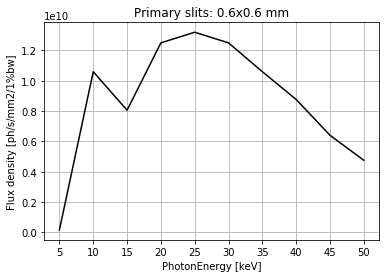

In [32]:
# plot flux density
f, ax = plt.subplots()
ax.plot(1e-3*BLfluxdata['E'][:10].astype('float'), BLfluxdata['Flux_d1BW'][:10].astype('float'), '-k')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [ph/s/mm2/1%bw]')
plt.xticks(np.arange(5, 55, 5))
plt.title('Primary slits: 0.6x0.6 mm')
plt.grid(True, which="both")
f.savefig("flux_density_Slits1_06.png", bbox_inches='tight', dpi=600)

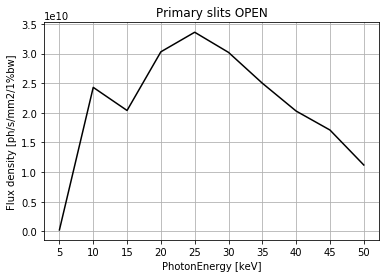

In [33]:
f, ax = plt.subplots()
ax.plot(1e-3*BLfluxdata['E'][20:30].astype('float'), BLfluxdata['Flux_d1BW'][20:30].astype('float'), '-k')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [ph/s/mm2/1%bw]')
plt.xticks(np.arange(5, 55, 5))
plt.title('Primary slits OPEN')
plt.grid(True, which="both")
f.savefig("flux_density_Slits1OPEN.png", bbox_inches='tight', dpi=600)